In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
print('Done')

Done


In [2]:
sale_data = pd.read_csv("C:/Users/prega/PycharmProjects/DataScarping/sales data file.csv")
sale_data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
sale_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [4]:
sale_data.describe ()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

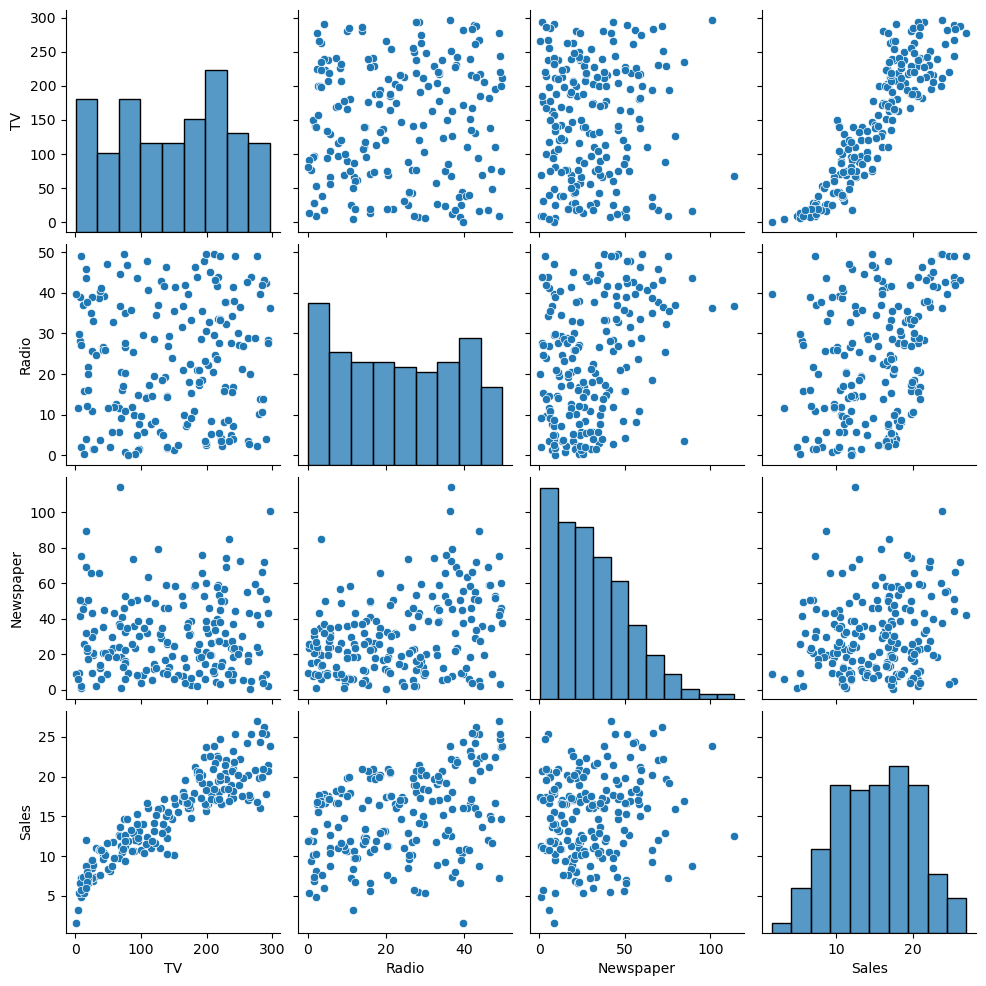

In [5]:
sns.pairplot(sale_data)
plt.show

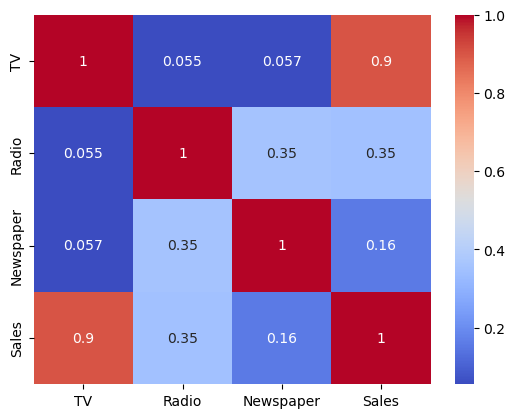

In [6]:
correlation_matrix = sale_data.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.show()

In [7]:
avg_sale = sale_data['Sales'].mean()
print('Average sale :' ,avg_sale)

Average sale : 15.130500000000001


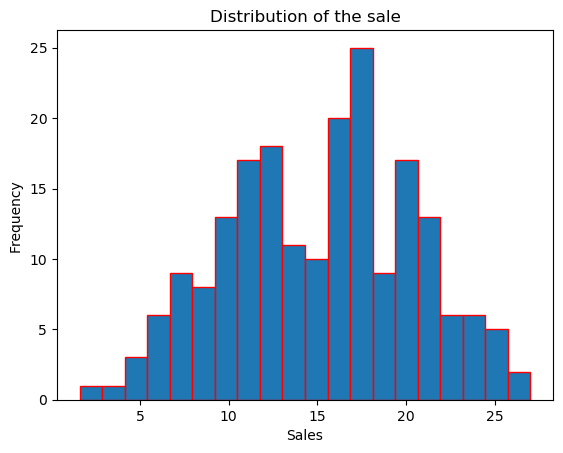

In [10]:
plt.hist(sale_data['Sales'], bins = 20, edgecolor = 'r')
plt.xlabel('Sales')
plt.ylabel('Frequency ')
plt.title('Distribution of the sale')
plt.show()

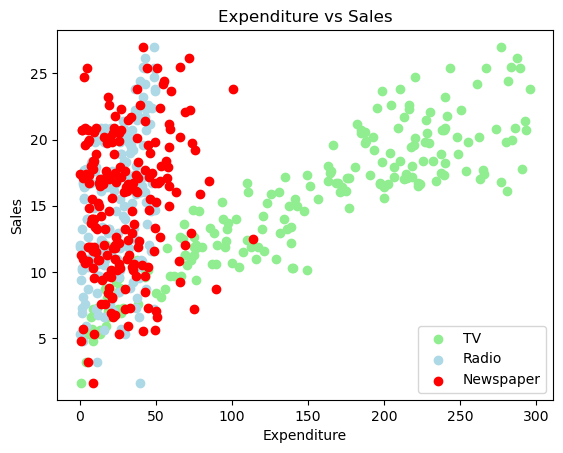

In [19]:
plt.scatter(sale_data['TV'], sale_data['Sales'], c = '#90EE90', label = 'TV')
plt.scatter( sale_data['Radio'], sale_data['Sales'], c = '#ADD8E6', label = 'Radio')
plt.scatter( sale_data['Newspaper'], sale_data['Sales'], c = 'red', label = 'Newspaper')
plt.xlabel('Expenditure')
plt.ylabel('Sales')
plt.legend()
plt.title('Expenditure vs Sales')
plt.show()

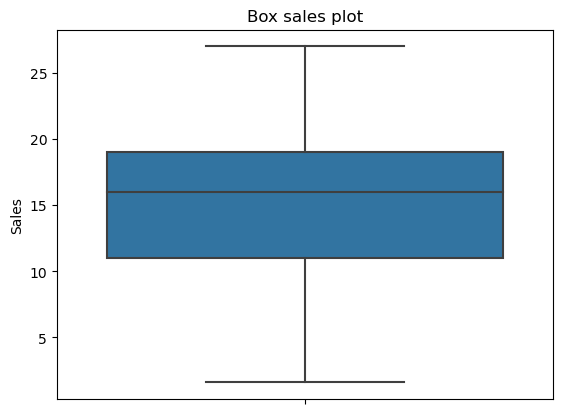

In [23]:
sns.boxplot(y = sale_data['Sales'])
plt.ylabel('Sales')
plt.title("Box sales plot")
plt.show()

In [26]:
summary_stats = sale_data['Sales'].describe()
Q1 = sale_data['Sales'].quantile(0.25)
Q3 = sale_data['Sales'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
outliers = sale_data[(sale_data['Sales'] < lower_bound) | (sale_data['Sales'] > upper_bound)]

print("Summary Stats of sale :")
print(summary_stats)
print("\nPotential outlies")
print(outliers)

Summary Stats of sale :
count    200.000000
mean      15.130500
std        5.283892
min        1.600000
25%       11.000000
50%       16.000000
75%       19.050000
max       27.000000
Name: Sales, dtype: float64

Potential outlies
Empty DataFrame
Columns: [TV, Radio, Newspaper, Sales]
Index: []


In [28]:
x = sale_data[['TV', 'Radio', 'Newspaper']]
y = sale_data['Sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error :", mse)
print("\nR-squared :", r2)


Mean squared error : 2.9077569102710905

R-squared : 0.9059011844150826


In [30]:
new_sale_data = pd.DataFrame({'TV':[200], 'Radio': [40], 'Newspaper':[20]})
predicted_sale = model.predict(new_sale_data)
print("Predicted Sale :", predicted_sale[0])

Predicted Sale : 19.740528001816998
